In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv("BTC-USD.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [18]:
df.columns = df.columns.str.lower()
ts = df['close']

In [19]:
adf_result = adfuller(ts.dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -2.387734791168616
p-value: 0.14522813963512338


In [20]:
#ARIMA Model

arima_model = ARIMA(ts, order=(1,1,1))
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=30)

arima_dates = pd.date_range(
    start=ts.index[-1] + pd.Timedelta(days=1),
    periods=30,
    freq="D"
)

arima_df = pd.DataFrame({
    "date": arima_dates,
    "arima_forecast": arima_forecast.values
})

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [21]:
# SARIMA Model
sarima_model = SARIMAX(
    ts,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_fit = sarima_model.fit(disp=False)

sarima_forecast = sarima_fit.forecast(steps=30)

sarima_df = pd.DataFrame({
    "date": arima_dates,
    "sarima_forecast": sarima_forecast.values
})


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [22]:
arima_df.to_csv("arima_forecast.csv", index=False)
sarima_df.to_csv("sarima_forecast.csv", index=False)

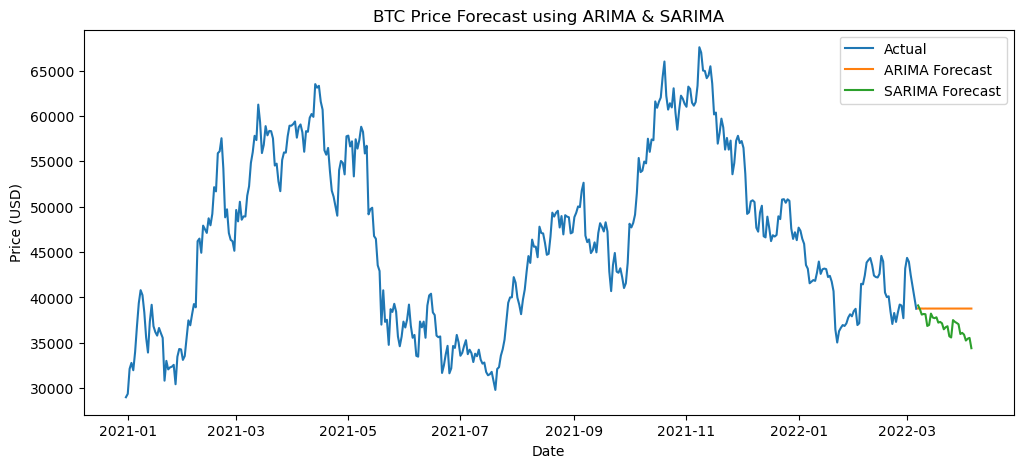

In [23]:
plt.figure(figsize=(12,5))
plt.plot(ts.index, ts, label="Actual")
plt.plot(arima_dates, arima_forecast, label="ARIMA Forecast")
plt.plot(arima_dates, sarima_forecast, label="SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("BTC Price Forecast using ARIMA & SARIMA")
plt.legend()
plt.show()